In [1]:
from sklearn.datasets import make_classification # used for classification dataset generation
import numpy as np

In [2]:
X, y = make_classification(n_samples=100, n_features=2, n_informative=1, n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41, hypercube=False, class_sep=10)

In [3]:
import matplotlib.pyplot as plt

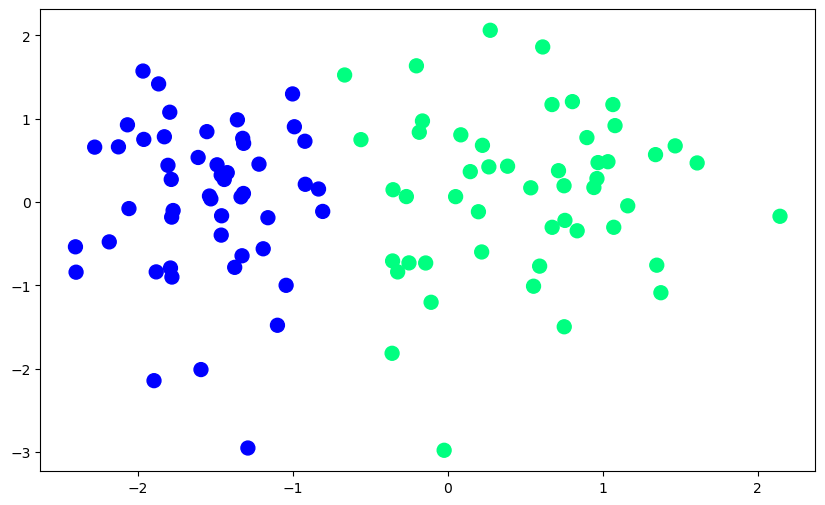

In [4]:
# data distribution
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter', s = 100)

In [9]:
def perceptron(X, y):
    # adding intercept's column
    X = np.insert(X, 0, 1, axis=1)
    weights = np.ones(X.shape[1]) # storing coefficient's values, intialized with 1
    lr = .1

    # 1000 epochs
    for i in range(1000):
        j = np.random.randint(0, 100) # randomly select any points
        y_hat = step(np.dot(X[j], weights)) # get predicted value
        weights = weights + lr*(y[j] - y_hat)*X[j] # check condition and update accordingly

    return weights[0], weights[1: ]

In [11]:
def step(z):
    return 1 if z > 0 else 0

In [13]:
intercept, coeff = perceptron(X, y)

In [15]:
print(intercept)
print(coeff)

1.0
[1.30185708 0.04482667]


In [17]:
# Ax + By + C = 0 --> y = mx + c (did by dividing y's intercept on both sides)
m = -(coeff[0]/coeff[1])
b = -(intercept/coeff[1])

In [19]:
# line's equation
x_input = np.linspace(-3, 3, 100)
y_input = m*x_input + b

(-3.0, 2.0)

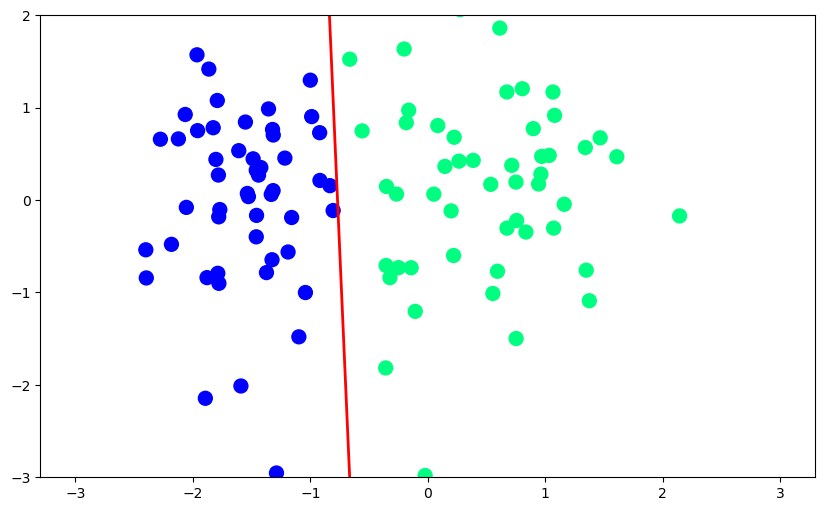

In [21]:
# plotting line
plt.figure(figsize=(10,6))
plt.plot(x_input, y_input, color='red', linewidth=2)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter', s=100)
plt.ylim(-3, 2)

In [23]:
def perceptron_animate(X, y):
    m = []
    b = []

    X = np.insert(X, 0, 1, axis = 1)
    weights = np.ones(X.shape[1])
    lr = .1

    for i in range(200):
        j =  np.random.randint(0, 100)
        y_hat = step(np.dot(X[j], weights))
        weights = weights + lr*(y[j] - y_hat)*X[j]

        m.append(-(weights[1]/weights[2]))
        b.append(-(weights[0]/weights[2]))

    return m,b

In [25]:
m, b = perceptron_animate(X, y)

In [52]:
%matplotlib notebook
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

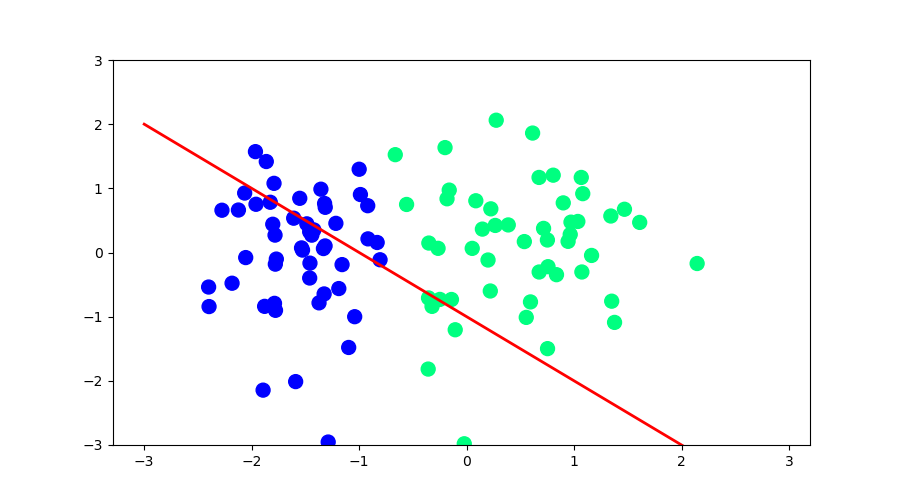

In [29]:
fig, ax = plt.subplots(figsize=(9, 5))

x_i = np.arange(-3, 3, .1)
y_i = x_i*m[0] + b[0]
ax.scatter(X[:, 0], X[:, 1], c=y, cmap='winter', s=100)
line, = ax.plot(x_i, x_i*m[0] + b[0], 'r-', linewidth=2)
plt.ylim(-3, 3)
def update(i):
    label = 'epoch {0}'.format(i+1)
    line.set_ydata(x_i*m[i] + b[i])
    ax.set_xlabel(label)

animate = FuncAnimation(fig, update, repeat=True, frames=200, interval=100)
plt.show()

### Using sklearn

In [23]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression()
lor.fit(X, y)

LogisticRegression()

In [25]:
m = -(lor.coef_[0][0]/lor.coef_[0][1])
b = -(lor.intercept_/lor.coef_[0][1])

In [27]:
x_input1 = np.linspace(-3, 3, 100)
y_input1 = m*x_input + b

(-3.0, 2.0)

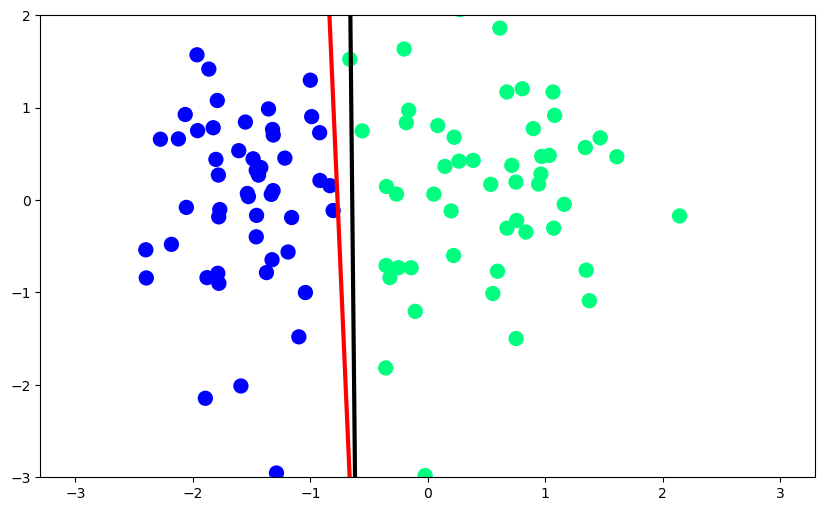

In [29]:
plt.figure(figsize=(10, 6))
plt.plot(x_input, y_input, color='red', linewidth=3) # my perceptron trick
plt.plot(x_input, y_input1, color='black', linewidth = 3) # sklearn's logistic regression
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter', s=100)
plt.ylim(-3, 2)

*black line is sklearn's logistic regression class's line and red is our perceptron trick's line.*  

**Which one is better ? and why ?**  
 sklearn's line is better because in our logic we are stopping when all randomly selected datapoints are satisfying the condition but in sklearn's logistic regression it's finding the best fit partition line which will be more accurate when there is less margin between the datapoints.